### importing libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn .metrics import classification_report,confusion_matrix
from keras.layers.normalization import BatchNormalization
import os
import h5py

### loading of training and testing data

In [2]:
df= pd.read_csv("fashion-mnist_train.csv")  
df1= pd.read_csv("fashion-mnist_test.csv")

In [3]:
df1.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape,df1.shape

((60000, 785), (10000, 785))

#### seperation of data and class/label

In [5]:
x_train=df.drop('label',1) 
xtrain=np.array(x_train)
y_train=df['label']

x_test=df1.drop('label',1)
xtest=np.array(x_test)
y_test=df1['label']

In [6]:
xtrain.shape, xtest.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [7]:
xtrain.shape

(60000, 784)

In [8]:
xtrain = xtrain/255.0   # scaling the data within (0,1)
xtest = xtest/255.0

In [9]:
xtrain.max(),xtest.max()

(1.0, 1.0)

In [10]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

#### dictionary for label

In [11]:
clothing=  {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

#### label counting

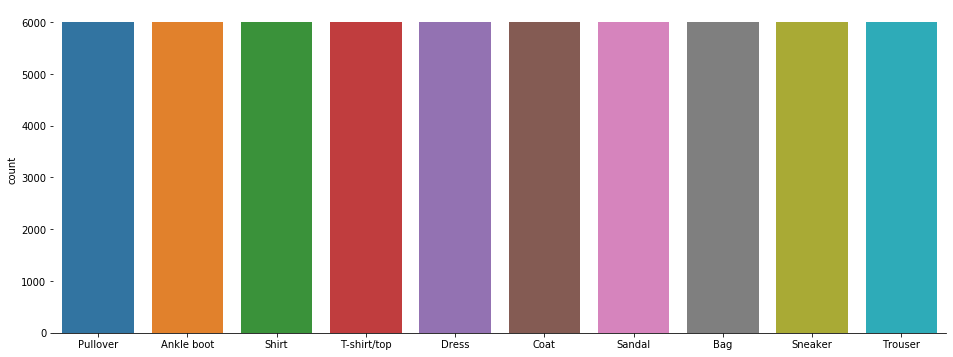

In [12]:
label = []
for i in range(len(y_train)):
    label.append(clothing[y_train[i]])
    
fig = plt.figure(figsize=(16,6))
sns.countplot(label)
sns.despine(left=True)
plt.show()

### making label encoding

In [13]:
ytrain= keras.utils.to_categorical(y_train,num_classes=10)
ytest=keras.utils.to_categorical(y_test,num_classes=10)

In [14]:
ytrain

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
l=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# *Making CNN Model

In [16]:
Xtrain=xtrain.reshape(-1,28,28,1)
Xtest=xtest.reshape(-1,28,28,1)
Xtrain.shape, Xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
ytrain.shape, ytest.shape, Xtrain[0].shape

((60000, 10), (10000, 10), (28, 28, 1))

In [18]:
Xtrain[0].shape

(28, 28, 1)

In [19]:
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5),padding='same', activation='relu',kernel_initializer='he_uniform', input_shape=(Xtrain[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'))
#model.add(Dropout(0.5))
#model.add(MaxPooling2D(pool_size=(2, 2)))


# ANN-LAYERS
model.add(Flatten())

model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.5))


# Classification layer
model.add(Dense(10, activation='softmax'))

adam = Adam()
#rms = RMSprop(learning_rate=0.00004, decay=1e-6, rho=0.92)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4832      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         96120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)              

In [21]:
hist = model.fit(Xtrain, ytrain, validation_data=(Xtest,ytest),epochs=20,batch_size=128,verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.5871 - accuracy: 0.7882 - val_loss: 0.4515 - val_accuracy: 0.8590
Epoch 2/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.3901 - accuracy: 0.8582 - val_loss: 0.3853 - val_accuracy: 0.8783
Epoch 3/20
60000/60000 [==============================] - 20s 331us/step - loss: 0.3424 - accuracy: 0.8760 - val_loss: 0.3484 - val_accuracy: 0.8811
Epoch 4/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.3152 - accuracy: 0.8841 - val_loss: 0.3175 - val_accuracy: 0.8955
Epoch 5/20
60000/60000 [==============================] - 21s 353us/step - loss: 0.2940 - accuracy: 0.8910 - val_loss: 0.2912 - val_accuracy: 0.9024
Epoch 6/20
60000/60000 [==============================] - 20s 330us/step - loss: 0.2787 - accuracy: 0.8971 - val_loss: 0.2753 - val_accuracy: 0.9052
Epoch 7/20
60000/60000 [==============================] 

In [22]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

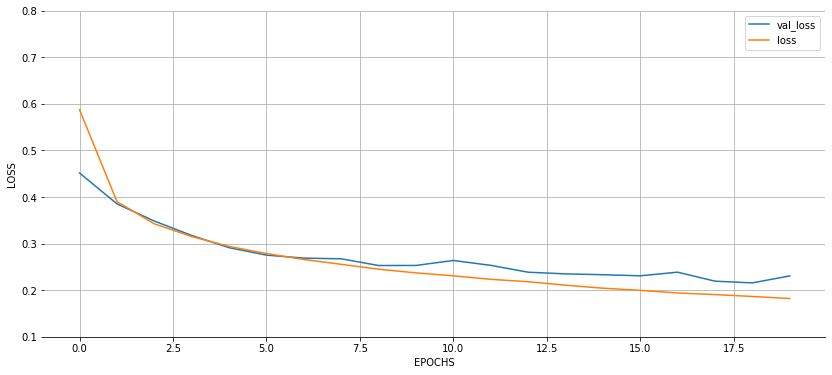

In [23]:
fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()


Value Accuracy |  91.54 %


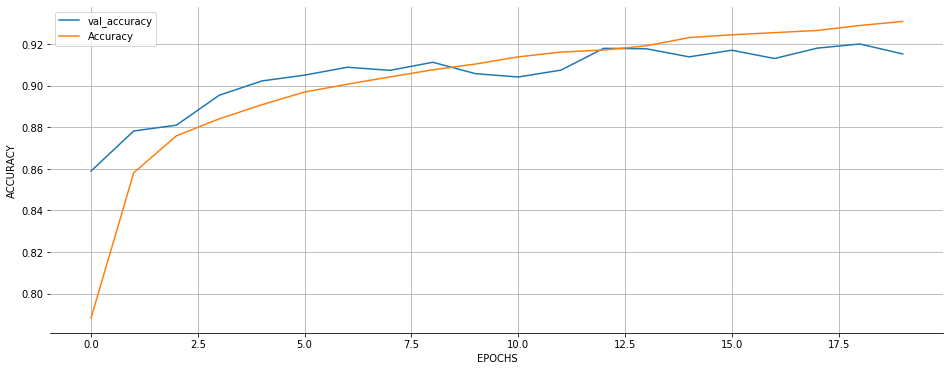

In [24]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

In [25]:
pred = model.predict(Xtest,batch_size=250)

In [26]:
prd =[]
for i in range(len(pred)):
    prd.append(np.argmax(pred.round()[i]))
    
con = pd.DataFrame(confusion_matrix(y_test,prd),index=l,columns=l)

In [27]:
print('\nConfusion Matrix--->')
con


Confusion Matrix--->


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,914,1,4,7,0,0,68,0,6,0
Trouser,7,983,1,8,0,0,1,0,0,0
Pullover,87,0,745,7,61,0,96,0,4,0
Dress,53,4,0,919,10,0,13,0,1,0
Coat,50,0,12,17,847,0,73,0,1,0
Sandal,0,0,1,0,0,977,0,17,0,5
Shirt,196,0,12,13,25,0,749,0,5,0
Sneaker,3,0,0,0,0,5,0,975,0,17
Bag,9,0,0,1,0,2,3,1,984,0
Ankle boot,2,0,0,0,0,2,0,30,0,966



Confusion Matrix Graph--->


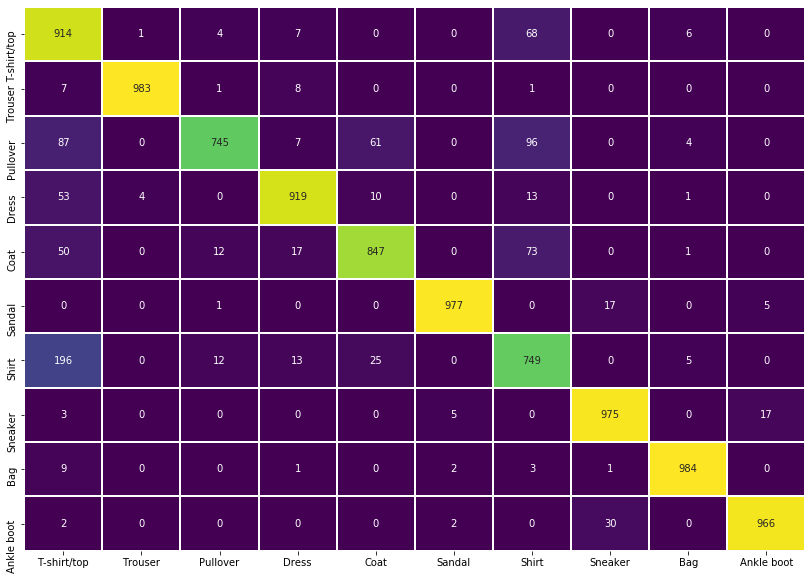

In [28]:
print('\nConfusion Matrix Graph--->')
fig = plt.figure(figsize=(14,10))
sns.heatmap(con,annot=True,cmap='viridis',linewidths=1,cbar=False,fmt='.5g')
plt.show()

In [29]:
pred_label=[]
label=[]
for i in range(len(prd)):
    pred_label.append(clothing[prd[i]])
    label.append(clothing[y_test[i]])
    
print(classification_report(label,pred_label))

              precision    recall  f1-score   support

  Ankle boot       0.98      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
        Coat       0.90      0.85      0.87      1000
       Dress       0.95      0.92      0.93      1000
    Pullover       0.96      0.74      0.84      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.75      0.75      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
 T-shirt/top       0.69      0.91      0.79      1000
     Trouser       0.99      0.98      0.99      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### *saving the model

In [30]:
model.save('fashion_ann_model.h5')
del model

#### *Oppening  the model

### This was first LeNeT model in 1998...


In [31]:
model = load_model('fashion_ann_model.h5')
model.summary()
print('This Is the first LeNeT Model')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4832      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         96120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)              

In [32]:
Xtest = xtest.reshape(-1,28,28,1)
pred = model.predict(Xtest,batch_size=200,verbose=0)

In [33]:
l = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']

In [34]:
Xtest = Xtest.reshape(-1,28,28)

Some Predicted Images


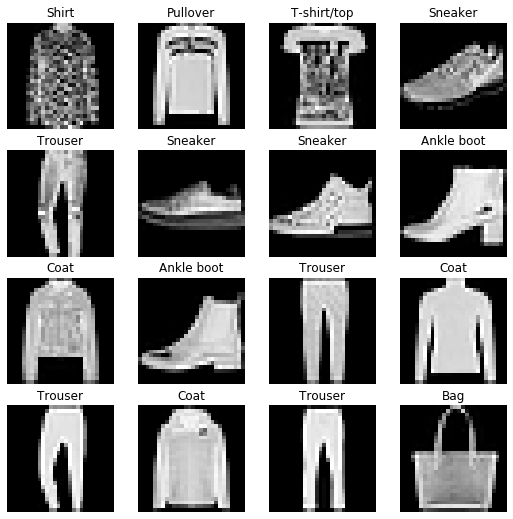

In [35]:
print('Some Predicted Images')
fig, axes = plt.subplots( 4,4,figsize = (9,9))
for row in axes:
    for j in row:
        index = np.random.randint(len(pred))
        j.imshow(Xtest[index],cmap='gray')
        j.set_title(clothing[np.argmax(pred[index])])
        j.set_axis_off()

In [36]:
wrong_pred=[]
right_pred=[]
img=[]
for i in range(len(y_test)):
    if y_test[i]==np.argmax(pred[i]):
        right_pred.append(y_test[i])
    else:
        wrong_pred.append(y_test[i])
        img.append(Xtest[i])
        
print('No. of Correct Predictions     : ',len(right_pred))
print('No. of Incorrect Predictions   : ',len(wrong_pred))

No. of Correct Predictions     :  9154
No. of Incorrect Predictions   :  846


Some wrong Predicted images : 


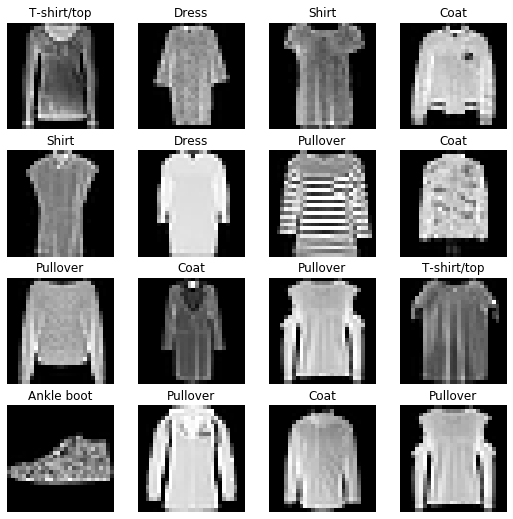

In [37]:
fig, axes = plt.subplots( 4,4,figsize = (9,9))
print('Some wrong Predicted images : ')
for row in axes:
    for j in row:
        index = np.random.randint(len(wrong_pred))
        j.imshow(img[index],cmap='gray')
        j.set_title(clothing[wrong_pred[index]])
        j.set_axis_off()

# Single Prediction :-

In [38]:
def prediction():
    try:
        plt.figure(figsize=(3,3))
        index= int(input("\nEnter index for test data :"))
        print('\n   Predicted Image :',clothing[np.argmax(pred[index])])
        plt.imshow(Xtest[index]*255,cmap='gray')
        plt.axis('off')
        plt.show()
        print('   Original Image :',clothing[np.argmax(ytest[index])])
    except:
        print("Enter index upto 9999")


Enter index for test data :120

   Predicted Image : T-shirt/top


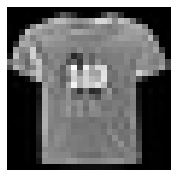

   Original Image : T-shirt/top


In [39]:
prediction()


Enter index for test data :450

   Predicted Image : Trouser


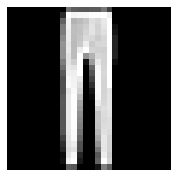

   Original Image : Trouser


In [40]:
prediction()

### *Conclussion

1. Model is mostly confused between the class "Shirt" & "T-Shirt/Top", see the confussion matrix & f1-Score,      otherwise model is perfectly predicted the classes without making any Transfer learning....

2. The CNN model is better than ANN model,if it is an image Classification Model...

3. A general CPU computer is able to train the above model perfectly..

4. With higher performing GPU computer may have slite better accuracy with transfer learning which I have not    tried here..